In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/shampoo.txt"

In [3]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.9 MB/s eta 0:00:00


In [4]:
import pickle
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

# ADF (Augmented Dickey-Fuller : ADF) TEST --> 정상성 검정
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

In [5]:
shampoo_df = pd.read_csv(path, sep=",")
shampoo_df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


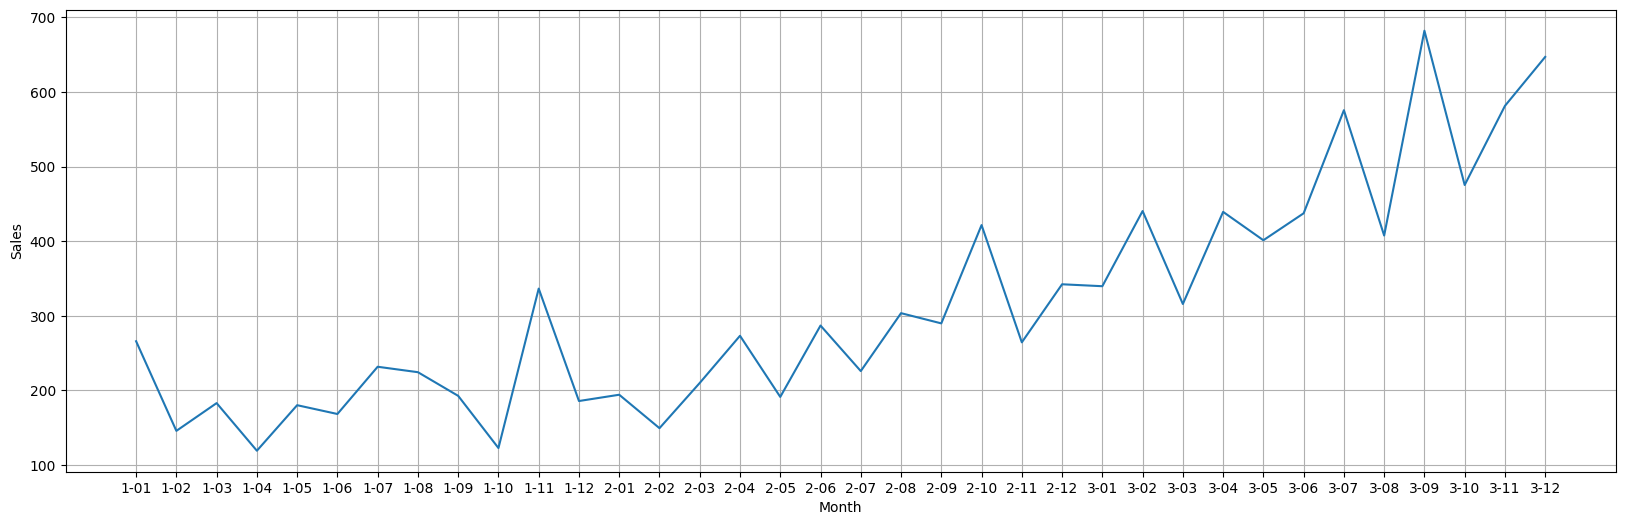

In [7]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.plot(shampoo_df["Month"], shampoo_df["Sales"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# 정상성 확인 : ADF검정
- H0 :주어진 시계열이 정상성을 가지지 않는다.
- H1 :주어진 시계열은 정상성을 갖는다.

In [8]:
adfuller(shampoo_df["Sales"])

(3.060142083641181,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.99726442630316)

In [10]:
shampoo_df["Sales_diff"] = shampoo_df["Sales"].diff()
shampoo_df.head()

,Month,Sales,Sales_diff
0,1-01,266.0,NaN
1,1-02,145.9,-120.1
2,1-03,183.1,37.2
3,1-04,119.3,-63.8
4,1-05,180.3,61.0


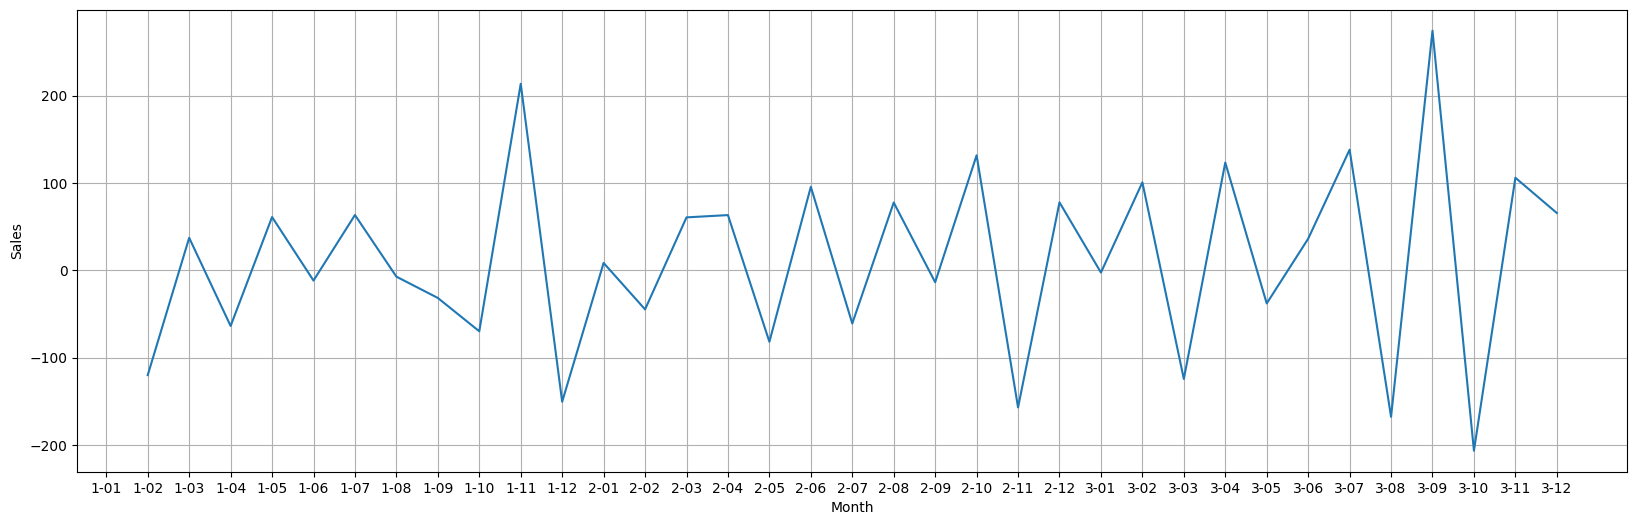

In [11]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.plot(shampoo_df["Month"], shampoo_df["Sales_diff"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [13]:
adfuller(shampoo_df["Sales_diff"].dropna())

(-7.249074055553854,
 1.7998574141687034e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

# autoARIMA Model

In [33]:
model_autoARIMA = auto_arima(shampoo_df["Sales"])

In [34]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -195.731
Date:                Thu, 23 Jan 2025   AIC                            401.463
Time:                        07:15:45   BIC                            409.240
Sample:                             0   HQIC                           404.147
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3027      6.174      1.507      0.132      -2.798      21.404
ar.L1          0.0891      0.314      0.284      0.776      -0.525       0.704
ma.L1         -1.3868      0.315     -4.406      0.000      -2.004      -0.770
ma.L2          0.9422      0.449      2.099      0.036       0.063       1.822
sigma2      3696.4075   1456.803      2.537      0.011     841.126    6551.689
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.64   Prob(JB):                         0.67
Heteroskedasticity (H):               0.95   Skew:                             0.30
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model_autoARIMA = auto_arima(shampoo_df["Sales"],
                             start_p=0, start_q=0,
                             max_p=3, max_q=3,
                             test="adf", #adf()을 통해서 d를 지정해주세요.
                             d=None,
                             m=1, #년(year)
                             seasonal=False, #계절성 없음
                             trace=True, #절차를 보여줘.
                             with_intercept='auto', #B0 상수항 자동으로 포함시켜줘.
                             stepwise=True) #p,q조합으로 진행해줘.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best 

In [36]:
print(model_autoARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -195.731
Date:                Thu, 23 Jan 2025   AIC                            401.463
Time:                        07:23:59   BIC                            409.240
Sample:                             0   HQIC                           404.147
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3027      6.174      1.507      0.132      -2.798      21.404
ar.L1          0.0891      0.314      0.284      0.776      -0.525       0.704
ma.L1         -1.3868      0.315     -4.406      0.0

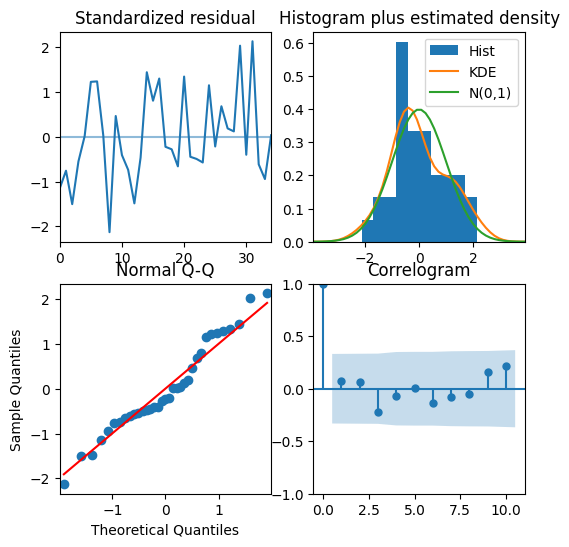

In [39]:
#모델 진단
# 잔차 = 실제값 - 예측값
# 잔차는 (표준)정규분포를 따라야하며, 잔차의 평균은 0 분산은 상수를 가짐
# 잔차끼리는 상관관계가 없어야 한다.

model_autoARIMA.plot_diagnostics(figsize=(6, 6))
plt.show()

# 예측

In [40]:
future_forecast = model_autoARIMA.predict(n_periods=12)
future_forecast

,0
36,605.427353
37,613.018404
38,622.997383
39,633.189088
40,643.399744
41,653.612088
42,663.824582
43,674.037090
44,684.249598
45,694.462107


# 모델 평가를 위해서 Train/Test Dataset으로 진행

- 시간의 순서대로 Train/Test Data로 나눠야 한다.

In [41]:
shampoo_df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [42]:
training_rate = 0.80
train = shampoo_df.loc[:int(len(shampoo_df)*training_rate),]
test = shampoo_df.loc[int(len(shampoo_df)*training_rate): ,]

In [43]:
len(shampoo_df), train.shape, test.shape

(36, (29, 2), (8, 2))

In [51]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(shampoo_df, test_size=(1/3), random_state=42, shuffle=False)
train.shape, test.shape

((24, 2), (12, 2))

In [52]:
train

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [60]:
model_autoARIMA = auto_arima(train["Sales"],
                             start_p=0, start_q=0,
                             max_p=3, max_q=3,
                             test="adf", #adf()을 통해서 d를 지정해주세요.
                             d=None,
                             m=1, #년(year)
                             seasonal=True, #계절성 없음
                             trace=True, #절차를 보여줘.
                             with_intercept='auto', #B0 상수항 자동으로 포함시켜줘.
                             stepwise=True) #p,q조합으로 진행해줘.

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=276.144, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=264.865, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=274.175, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=266.321, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=263.115, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=264.762, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=263.638, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=263.859, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=265.433, Time=0.78 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.933 seconds
                               SARIMAX Results                                
Dep. Variable:                   

In [61]:
y_pred = model_autoARIMA.predict(n_periods=len(test))
y_pred

,0
24,289.642082
25,325.282909
26,301.159879
27,317.487238
28,306.436277
29,313.915976
30,308.853439
31,312.279952
32,309.960761
33,311.530475


In [62]:
pred_df = pd.DataFrame(y_pred, index = test.index, columns = ['pred'])
pred_df

,pred
24,289.642082
25,325.282909
26,301.159879
27,317.487238
28,306.436277
29,313.915976
30,308.853439
31,312.279952
32,309.960761
33,311.530475


In [63]:
result_df = pd.concat([test, pred_df], axis=1)
result_df

,Month,Sales,pred
24,3-01,339.7,289.642082
25,3-02,440.4,325.282909
26,3-03,315.9,301.159879
27,3-04,439.3,317.487238
28,3-05,401.3,306.436277
29,3-06,437.4,313.915976
30,3-07,575.5,308.853439
31,3-08,407.6,312.279952
32,3-09,682.0,309.960761
33,3-10,475.3,311.530475


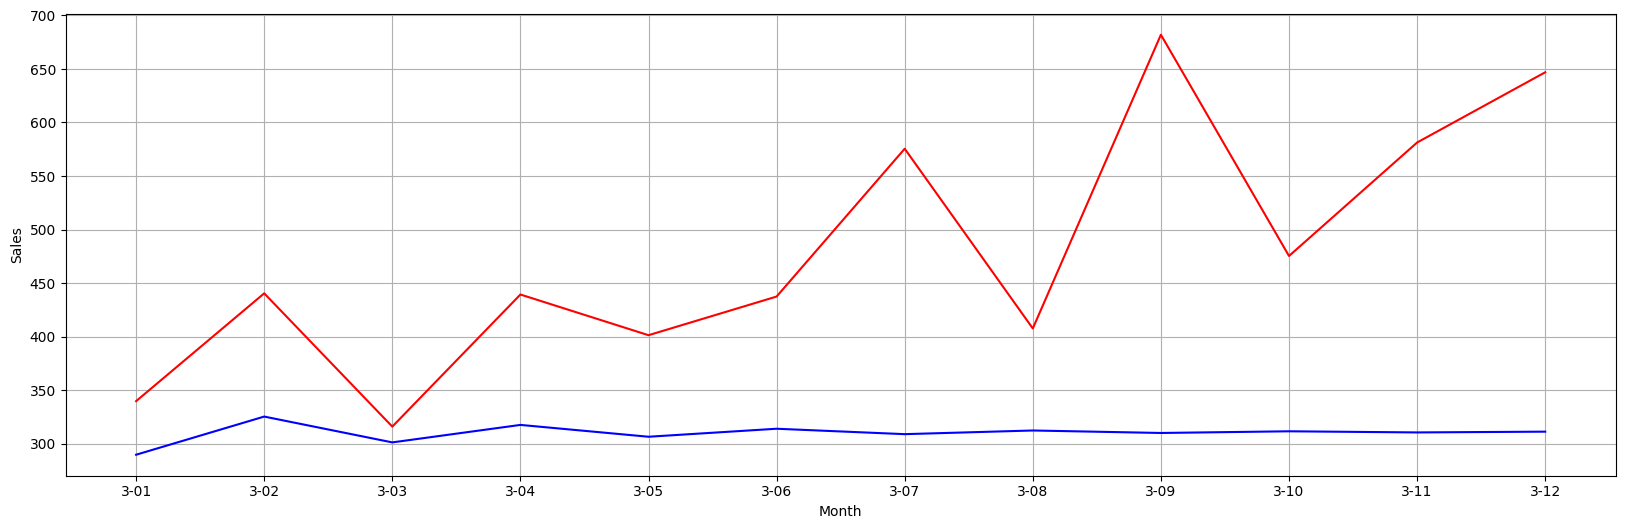

In [64]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.plot(result_df["Month"], result_df["Sales"], color="r")
plt.plot(result_df["Month"], result_df["pred"], color="b")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [66]:
train.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [67]:
# Holt-Winters 모델 적용
model = ExponentialSmoothing(
    train["Sales"],
    trend="add",        # 추세(Trend): 'additive' 또는 'multiplicative'
    seasonal="add",     # 계절성(Seasonality): 'additive' 또는 'multiplicative'
    seasonal_periods=12 # 계절 주기
)
fit = model.fit()

In [68]:
# 결과 요약
print(fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   24
Model:             ExponentialSmoothing   SSE                          64110.848
Optimized:                         True   AIC                            221.368
Trend:                         Additive   BIC                            240.216
Seasonal:                      Additive   AICC                           358.168
Seasonal Periods:                    12   Date:                 Thu, 23 Jan 2025
Box-Cox:                          False   Time:                         08:06:17
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0188022                alpha                 True
smoothing_trend          

In [69]:
forecast = fit.forecast(len(test))  # 향후 12개월 예측

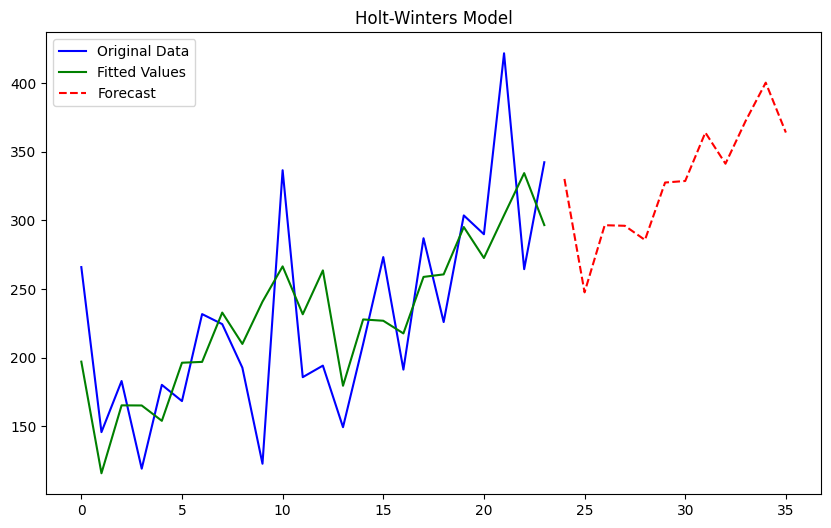

In [70]:
# 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(train.index, train["Sales"], label="Original Data", color="blue")
plt.plot(fit.fittedvalues, label="Fitted Values", color="green")
plt.plot(forecast.index, forecast, label="Forecast", color="red", linestyle="--")
plt.legend()
plt.title("Holt-Winters Model")
plt.show()